In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [5]:
from glob import glob
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

from srgan import create_gen, build_vgg2

In [2]:
def random_image():
    paths = glob('mc_64/*.png')
    path = random.choice(paths)
    image = cv2.imread(path)[..., ::-1]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR) / 255
    return image

In [6]:
lr_ip = Input(shape=(64,64,3))
generator = create_gen(lr_ip)
generator.load_weights('checkpoints/checkpoint_46.h5')

In [35]:
vgg = build_vgg2()

(64, 64, 3) float64 0.9921568627450981


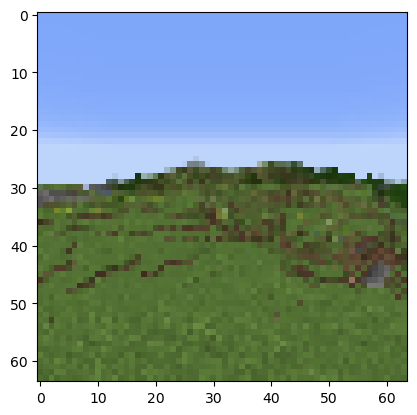

In [4]:
mc_image = random_image()
print(mc_image.shape, mc_image.dtype, np.max(mc_image))
plt.imshow(mc_image)

In [37]:
real_image = generator.predict_on_batch(mc_image[None, ...])

2023-07-03 23:58:53.053048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1,64,64,3]
	 [[{{node Placeholder/_0}}]]


In [38]:
real_image = vgg(real_image)

TypeError: Invalid shape (1, 16, 16, 512) for image data

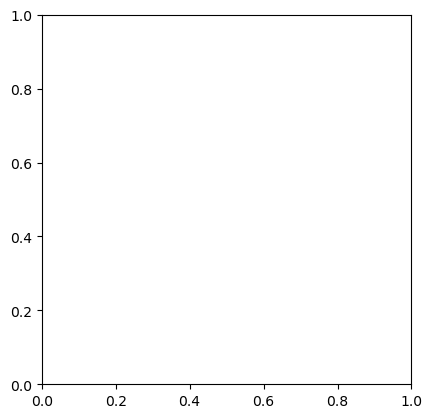

In [39]:
plt.imshow(real_image)

In [ ]:
plt.imshow(real_image)

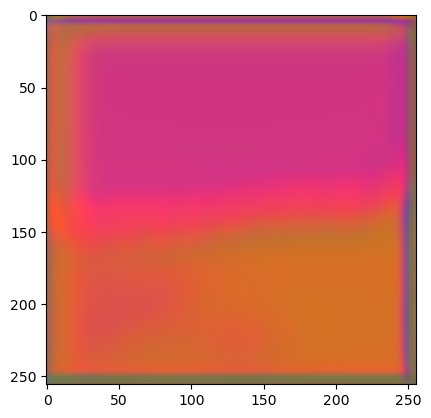

In [14]:
plt.imshow((real_image+22.704529)/(30.721388+22.704529))